In [6]:
# !pip install tensorflow_datasets
!pip install tensorflow

In [7]:
import tensorflow_datasets as tfds
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

In [8]:
imdb,info = tfds.load('imdb_reviews',with_info = True,as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.UC4QTY_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.UC4QTY_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.UC4QTY_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


In [9]:
imdb

{Split('train'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('test'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 Split('unsupervised'): <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [10]:
train_data,test_data = imdb["train"],imdb["test"]

In [11]:
# for a,b in train_data:
#     print(a,b)

In [12]:
training_sentences = []
training_labels = []
testing_sentences = []
testing_labels = []

for s,l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s,l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())

In [13]:
training_labels[0]

np.int64(0)

In [14]:
len(training_sentences),len(testing_sentences)

(25000, 25000)

In [15]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [16]:
#Preprocessing

In [17]:
help(Tokenizer)

Help on class Tokenizer in module keras.src.legacy.preprocessing.text:

class Tokenizer(builtins.object)
 |  Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, analyzer=None, **kwargs)
 |
 |  DEPRECATED.
 |
 |  Methods defined here:
 |
 |  __init__(self, num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, analyzer=None, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |
 |  fit_on_sequences(self, sequences)
 |
 |  fit_on_texts(self, texts)
 |
 |  get_config(self)
 |
 |  sequences_to_matrix(self, sequences, mode='binary')
 |
 |  sequences_to_texts(self, sequences)
 |
 |  sequences_to_texts_generator(self, sequences)
 |
 |  texts_to_matrix(self, texts, mode='binary')
 |
 |  texts_to_sequences(self, texts)
 |
 |  texts_to_sequences_generator(self, texts)
 |
 |  to_json(self, **kwargs)
 |
 |  ------------------

In [18]:
tokenizer = Tokenizer(num_words = 10000)

In [19]:
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen = 500, truncating = 'post', padding = 'post')
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen = 500,truncating = 'post',padding = 'post')

In [20]:
padded.shape

(25000, 500)

In [21]:
padded[0]

array([  58,   11,   13,   34,  438,  399,   17,  173,   28,    8,   32,
       1377, 3400,   41,  495,  196,   24,   87,  155,   18,   11,  210,
        339,   28,   69,  247,  212,    8,  485,   61,   69,   87,  115,
         98,   23, 5739,   11, 3316,  656,  776,   11,   17,    6,   34,
        405, 8227,  177, 2476,  425,    1,   91, 1252,  139,   71,  148,
         54,    1, 7524,   71,  228,   69, 2961,   15, 2879, 1505, 4997,
          2,   39, 3946,  118, 1607,   16, 3400,   13,  162,   18,    3,
       1252,  926, 7985,    8,    3,   17,   12,   13, 4199,    4,  101,
        147, 1236,   10,  239,  691,   12,   43,   24,  100,   38,   11,
       7231,   38, 1377,   51,  408,   10,   98, 1213,  873,  144,    9,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [22]:

#Build the model

In [23]:
from keras.models import Sequential
from keras.layers import Dense,Embedding,SimpleRNN,Bidirectional,LSTM,GRU

In [24]:
#Simple RNN

In [25]:
model_rnn = Sequential([
    Embedding(10000,50,input_length = 500),
    LSTM(32),
    Dense(10,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [26]:
model_rnn.compile(loss = 'binary_crossentropy',optimizer = 'adam',metrics = ['accuracy'])

In [27]:
history = model_rnn.fit(padded,training_labels,epochs = 10,validation_data = (testing_padded,testing_labels))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 102ms/step - accuracy: 0.5051 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6930
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.5072 - loss: 0.6915 - val_accuracy: 0.5096 - val_loss: 0.6909
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.5207 - loss: 0.6717 - val_accuracy: 0.5090 - val_loss: 0.6989
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.5367 - loss: 0.6496 - val_accuracy: 0.5101 - val_loss: 0.7113
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.5418 - loss: 0.6455 - val_accuracy: 0.5108 - val_loss: 0.7391
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 79s 101ms/step - accuracy: 0.5402 - loss: 0.6399 - val_accuracy: 0.5106 - val_loss: 0.7452
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.5391 - loss: 0.6405 - val_accuracy: 0.5090 - val_loss: 0.7510
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.5440 - loss: 0

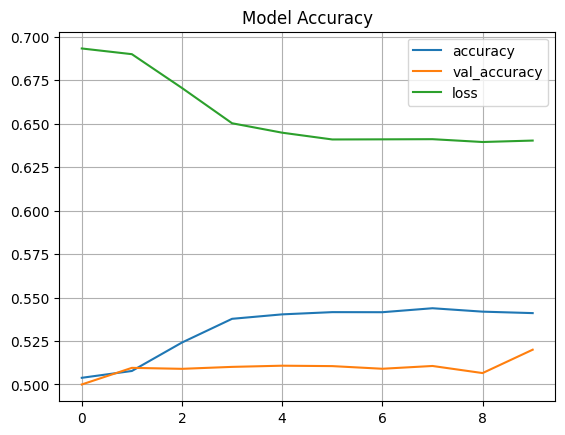

In [28]:
plt.plot(history.history['accuracy'],label = 'accuracy')
plt.plot(history.history['val_accuracy'],label = 'val_accuracy')
plt.plot(history.history['loss'],label = 'loss')
plt.title('Model Accuracy')
plt.grid()
plt.legend()

In [28]:
new1 = 'This was worst moview. Please do not watch it. WAste of money and time'
new2 = "A must watch movie, I lived to watch it. It was just amazing."